In [3]:
# UN System Revenue Data Analysis

# ## Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Optional for notebook display
%matplotlib inline
sns.set(style="whitegrid")

In [10]:
# ## Step 2: Load Dataset
df = pd.read_csv("../dataset/revenue.csv")

In [11]:
# ## Step 3: Initial Exploration
print("\n--- Dataset Info ---")
df.info()
print("\n--- Total Missing Values ---")
print(df.isnull().sum().sum())
print("\n--- Sample Rows ---")
print(df.head(3))



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35679 entries, 0 to 35678
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   agency         35679 non-null  object
 1   calendar_year  35679 non-null  int64 
 2   amount         35679 non-null  object
 3   sub_type_name  35679 non-null  object
 4   rev_type       35679 non-null  object
 5   sub_type       35679 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB

--- Total Missing Values ---
0

--- Sample Rows ---
  agency  calendar_year     amount                              sub_type_name  \
0   IFAD           2018  217842469             Voluntary untied contributions   
1   IFAD           2018    1429000               Single-agency thematic funds   
2   IFAD           2018   91893000  Project/ programme specific contributions   

                                       rev_type sub_type  
0   Voluntary core (un-earmarked) contr

### The above analysis shows us clearly
 - Data type error 
    - Amount in object dtype
- No missing values

#### To do
  - Change data type "amount" column to float

In [12]:
# change 'object' type to 'float'
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['calendar_year'] = pd.to_numeric(df['calendar_year'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35679 entries, 0 to 35678
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   agency         35679 non-null  object 
 1   calendar_year  35679 non-null  int64  
 2   amount         35677 non-null  float64
 3   sub_type_name  35679 non-null  object 
 4   rev_type       35679 non-null  object 
 5   sub_type       35679 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


In [14]:
# ## Step 4: Rename Columns for Clarity
columns_mapping = {
    "agency": "Agency",
    "calendar_year": "Year",
    "amount": "Amount",
    "sub_type_name": "SubTypeName",
    "rev_type": "RevenueType",
    "sub_type": "SubType"
}
df.rename(columns=columns_mapping, inplace=True)

In [15]:
df.RevenueType.unique()

array(['Voluntary core (un-earmarked) contributions',
       'Voluntary non-core (earmarked) contributions',
       'Revenue from other activities', 'Assessed contributions',
       'Assessed Contributions'], dtype=object)

- There is inconsistency of values in RevenueType

In [16]:
df['RevenueType'] = df['RevenueType'].str.lower().str.capitalize()

In [17]:
df.RevenueType.unique()

array(['Voluntary core (un-earmarked) contributions',
       'Voluntary non-core (earmarked) contributions',
       'Revenue from other activities', 'Assessed contributions'],
      dtype=object)

In [18]:
df.SubTypeName.unique()

array(['Voluntary untied contributions', 'Single-agency thematic funds',
       'Project/ programme specific contributions',
       'Revenue from global vertical funds',
       'Revenue from other activities', 'Local resources',
       'Assessed contributions', 'UN Inter-agency pooled funds',
       'In-kind earmarked contributions', 'In-kind untied contributions',
       'Voluntary core (un-earmarked) contributions',
       'Voluntary non-core (earmarked) contributions',
       'Other revenue - specific to the UN entity',
       'Other revenue - other UN entities',
       'Other revenue - external to UN'], dtype=object)

In [19]:
df.SubType.unique()

array(['R02A', 'R03B', 'R03E', 'R03C', 'R04', 'R03D', 'R01', 'R03A',
       'R03F', 'R02B', 'R02', 'R03', 'R04A', 'R04B', 'R04C'], dtype=object)

In [20]:
df.head()

,Agency,Year,Amount,SubTypeName,RevenueType,SubType
0,IFAD,2018,217842469.0,Voluntary untied contributions,Voluntary core (un-earmarked) contributions,R02A
1,IFAD,2018,1429000.0,Single-agency thematic funds,Voluntary non-core (earmarked) contributions,R03B
2,IFAD,2018,91893000.0,Project/ programme specific contributions,Voluntary non-core (earmarked) contributions,R03E
3,IFAD,2018,59662000.0,Revenue from global vertical funds,Voluntary non-core (earmarked) contributions,R03C
4,IFAD,2018,64393000.0,Revenue from other activities,Revenue from other activities,R04


In [21]:
# ## Step 5: Data Cleaning
df.dropna(subset=['Agency', 'Year', 'Amount'], inplace=True)


In [22]:
# Display the amount of total revenue by grouping into year
revenue_grouped_by_year = df.groupby('Year')['Amount'].sum().reset_index
print(revenue_grouped_by_year)

<bound method Series.reset_index of Year
2011    3.963828e+10
2012    4.232368e+10
2013    4.463886e+10
2014    4.807984e+10
2015    4.734446e+10
2016    4.933323e+10
2017    5.319970e+10
2018    5.604410e+10
2019    5.692497e+10
2020    6.259929e+10
2021    6.589071e+10
2022    7.430215e+10
2023    6.762087e+10
Name: Amount, dtype: float64>


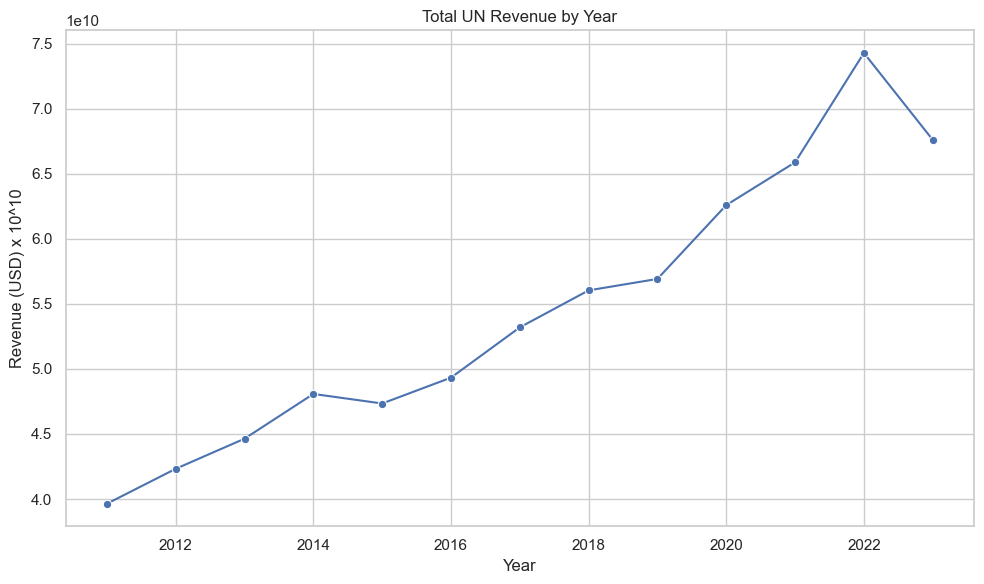

In [23]:
# Visualize the total amount grouped by year (Total revenue by year)
revenue_by_year = df.groupby("Year")["Amount"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Amount", data=revenue_by_year, marker='o')
plt.title("Total UN Revenue by Year")
plt.ylabel("Revenue (USD) x 10^10")
plt.xlabel("Year")
plt.tight_layout()
plt.savefig("revenue_trend.png")
plt.show()


In [24]:
print(revenue_by_year)

    Year        Amount
0   2011  3.963828e+10
1   2012  4.232368e+10
2   2013  4.463886e+10
3   2014  4.807984e+10
4   2015  4.734446e+10
5   2016  4.933323e+10
6   2017  5.319970e+10
7   2018  5.604410e+10
8   2019  5.692497e+10
9   2020  6.259929e+10
10  2021  6.589071e+10
11  2022  7.430215e+10
12  2023  6.762087e+10


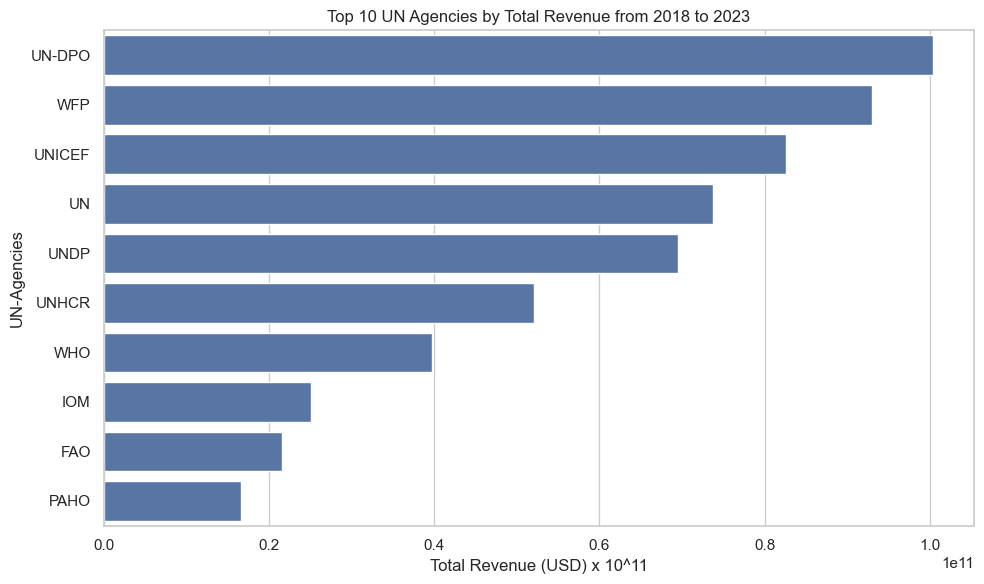

In [25]:
# Top agencies by total revenue
top_agencies = df.groupby("Agency")["Amount"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="Amount", y="Agency", data=top_agencies)
plt.title("Top 10 UN Agencies by Total Revenue from 2018 to 2023")
plt.xlabel("Total Revenue (USD) x 10^11")
plt.ylabel("UN-Agencies")
plt.tight_layout()
plt.savefig("Top_10.png")
plt.show()

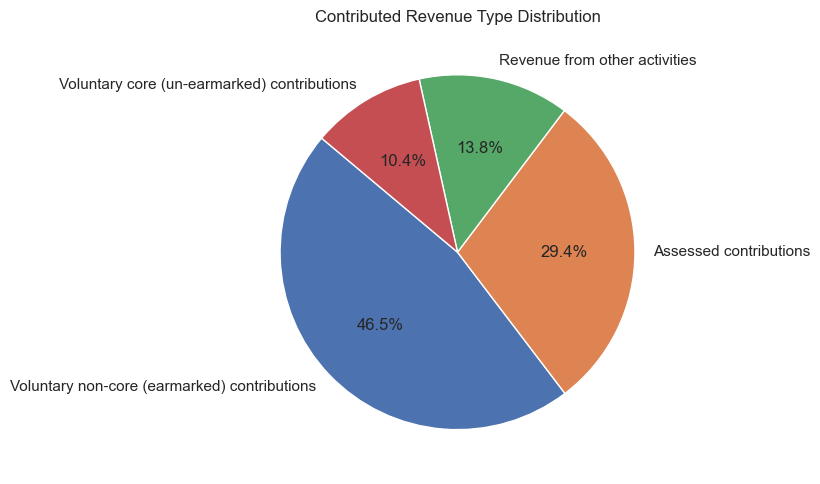

In [26]:
# Revenue type distribution
plt.figure(figsize=(8,5))
df['RevenueType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Contributed Revenue Type Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("revenue_distribution.png")
plt.show()


In [28]:
# Save Cleaned Data
# Optional: Save cleaned dataset for dashboard or further analysis
df.to_csv("../dataset/cleaned_un_revenue.csv", index=False)
print("Cleaned dataset saved as 'cleaned_UN_revenue.csv'")


Cleaned dataset saved as 'cleaned_UN_revenue.csv'
